# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.


/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [263]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_info_rows", 150)

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1.pkl

In [181]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = joblib.load('data1.plk') 
data

,Date,taxi_count,call,catch,wait_time,cost,dist,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean,catch_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter,1.0,10764.000000,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,Winter,0.0,9687.500000,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,Winter,0.0,9857.666667,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter,0.0,10132.000000,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,Winter,0.0,9838.200000,0.877647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter,0.0,8567.285714,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter,0.0,8574.428571,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter,0.0,8629.000000,0.808952
2921,2022-12-30,600,5293,4200,38.3,2183,8155,52,12,2022,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,Winter,0.0,8650.714286,0.793501


## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [182]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var])#, kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()


In [183]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

<AxesSubplot:xlabel='Date', ylabel='taxi_count'>

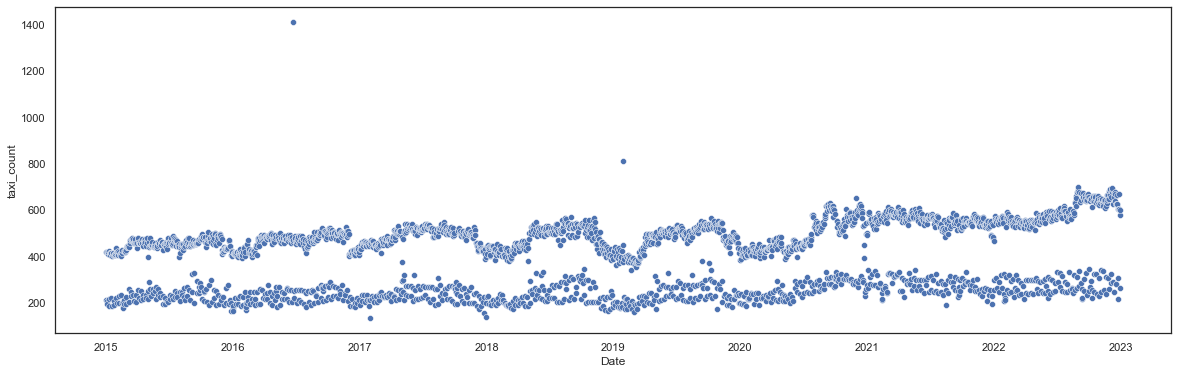

In [184]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date',y='taxi_count',data=data)

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
taxi_count,2923.0,418.647622,133.764485,132.0,278.0,454.0,522.0,1413.0


/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


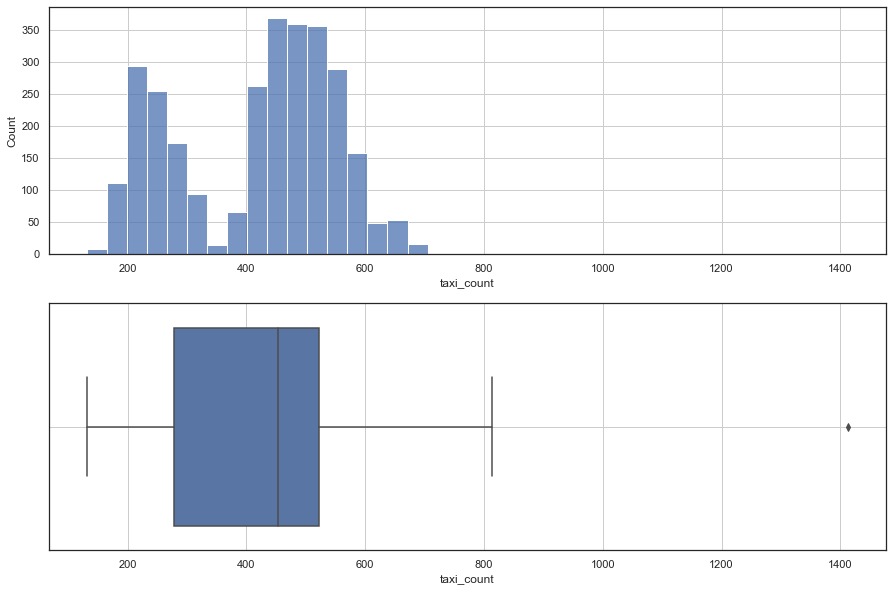

In [185]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data,'taxi_count')

,count,mean,std,min,25%,50%,75%,max
catch,2923.0,3283.234348,1249.463168,462.0,1778.5,3932.0,4241.0,5189.0


/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


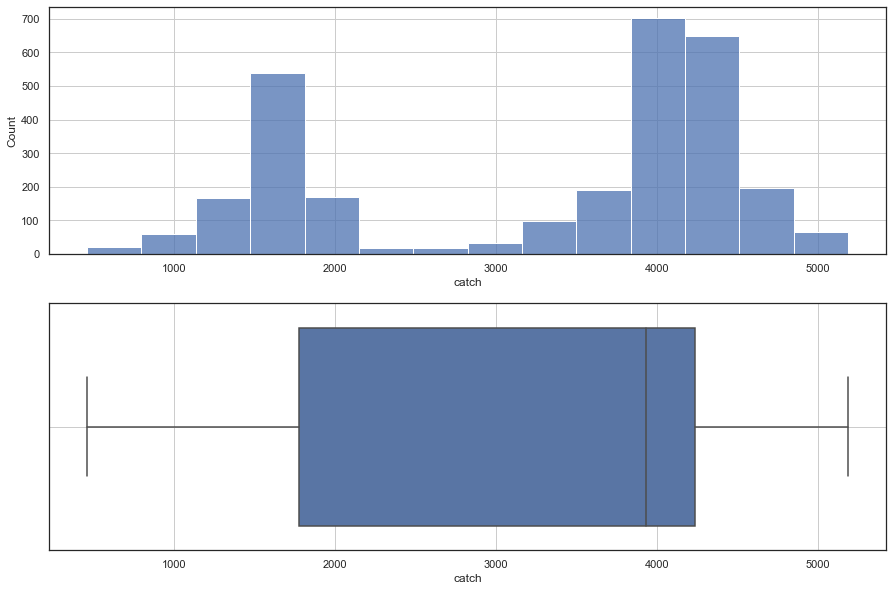

In [186]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data,'catch')

In [187]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [188]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
wait_time,2923.0,40.300171,14.099285,17.2,29.6,38.2,48.6,96.1


/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


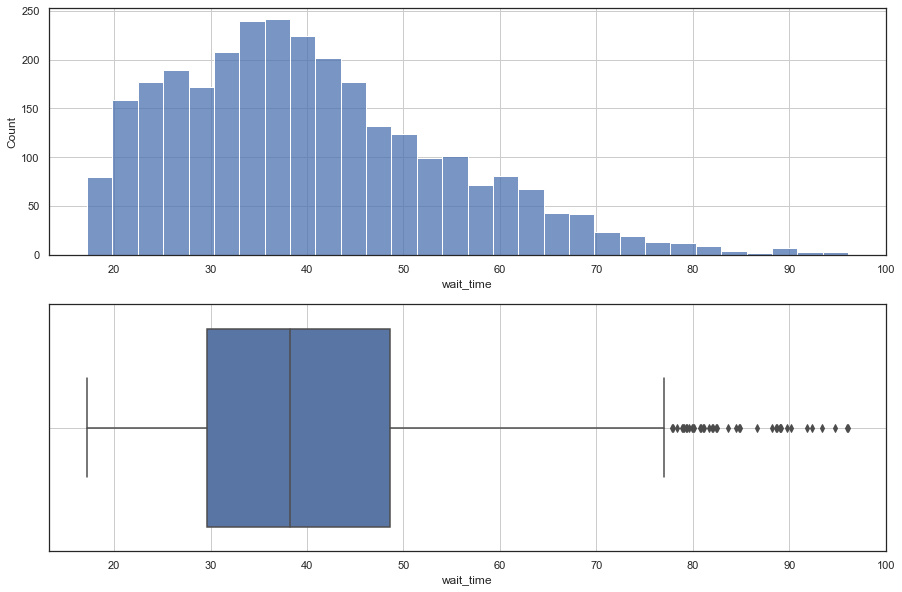

In [189]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data,'wait_time')

In [190]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [191]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [192]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
cost,2923.0,2304.362299,107.351769,2131.0,2228.0,2257.0,2401.0,2733.0


/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


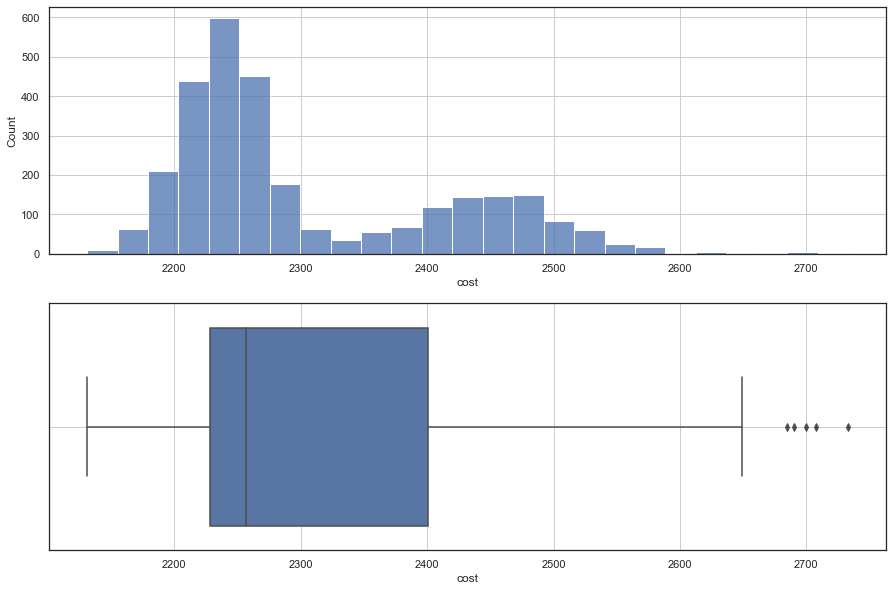

In [193]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data,'cost')

In [194]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [195]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [196]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
dist,2923.0,9254.353062,1020.066902,7672.0,8521.0,8822.0,10154.0,14136.0


/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


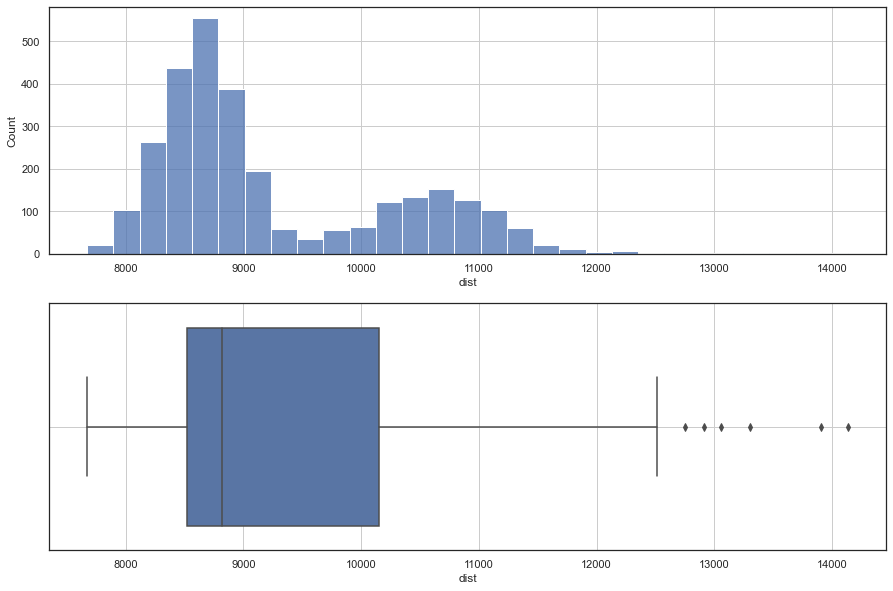

In [197]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data,'dist')

In [198]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [199]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [200]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [201]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
catch_rate,2923.0,0.841565,0.052167,0.596996,0.805964,0.845571,0.877718,0.968844


/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


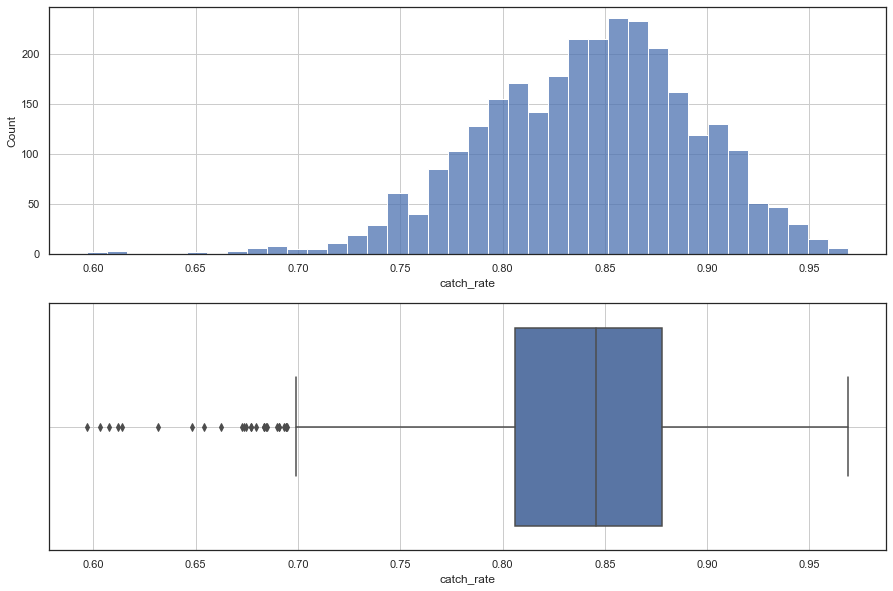

In [202]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data,'catch_rate')

In [203]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [204]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [205]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2923.0,18.07181,10.711662,-11.2,9.0,19.7,27.4,39.4


/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


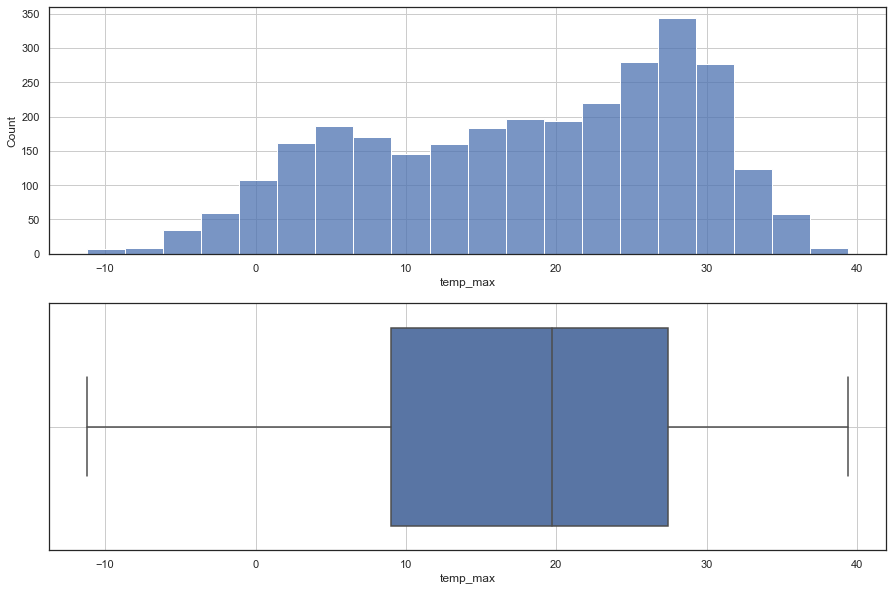

In [206]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data,'temp_max')

In [207]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [208]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [209]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [210]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2923.0,3.354465,12.593801,0.0,0.0,0.0,0.3,178.9


/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


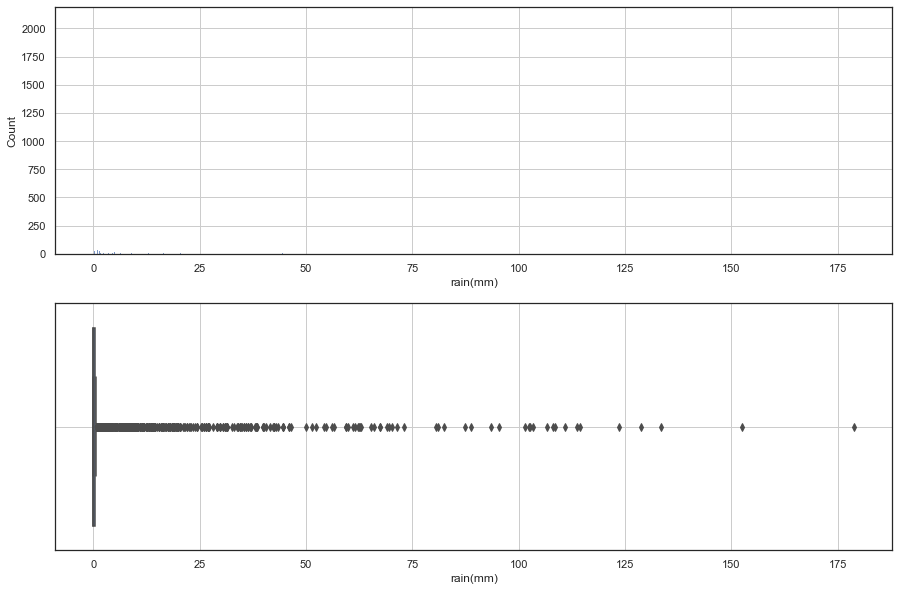

In [211]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data,'rain(mm)')

<AxesSubplot:xlabel='wait_time', ylabel='rain(mm)'>

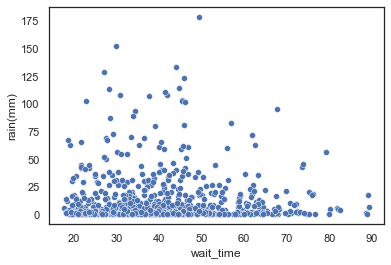

In [212]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.scatterplot(x='wait_time',y='rain(mm)',data=data.loc[data['rain(mm)']!=0.])

In [306]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


In [307]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 공휴일 유무

,Count,Prop
holiday,,
0.0,2803,0.958946
1.0,120,0.041054


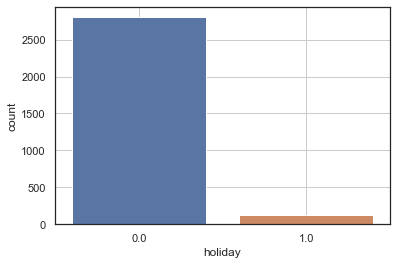

In [215]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_c(data,'holiday')

In [216]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

<AxesSubplot:>

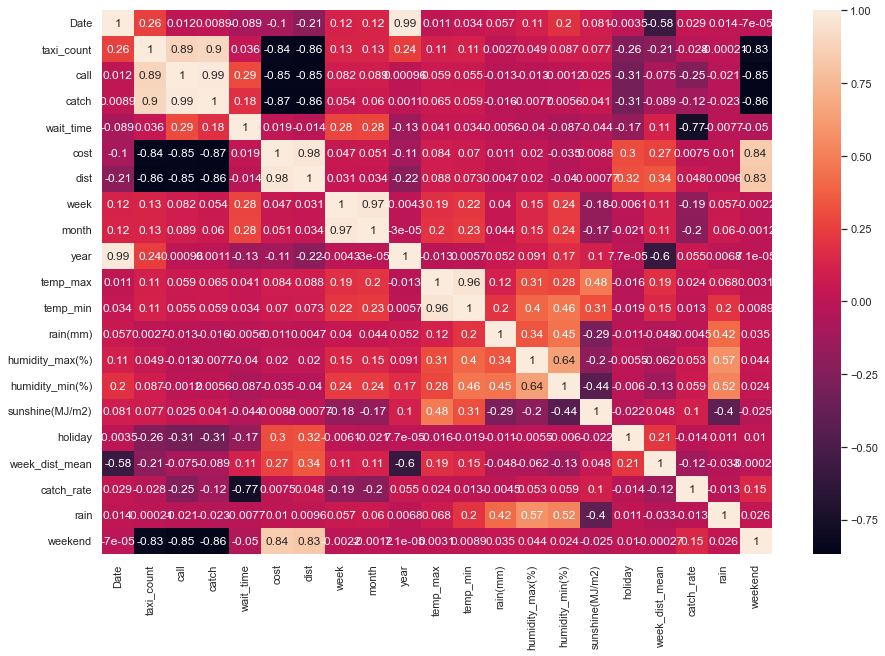

In [221]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,10))
sns.heatmap(data.drop(['weekday','season'],axis=1).corr(),annot=True)

#### 1) 전체 상관계수 시각화

In [149]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

,cost,dist,call,catch,taxi_count,wait_time,weekend
cost,1.0,0.977614,-0.850360,-0.867966,-0.844599,0.019276,0.840800
dist,0.0,1.000000,-0.847801,-0.858673,-0.857587,-0.014135,0.825798
call,-0.0,-0.000000,1.000000,0.988760,0.885944,0.292297,-0.853905
catch,-0.0,-0.000000,0.000000,1.000000,0.904711,0.184828,-0.855196
taxi_count,-0.0,-0.000000,0.000000,0.000000,1.000000,0.036265,-0.828188
wait_time,0.0,-0.000000,0.000000,0.000000,0.000000,1.000000,-0.049504
weekend,0.0,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1.000000


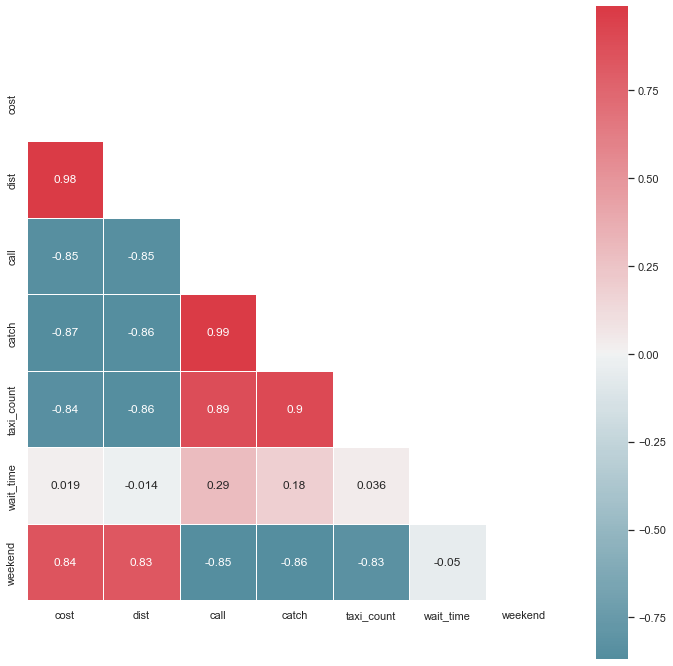

In [222]:


num_vars = ['cost','dist','call','catch','taxi_count','wait_time','weekend']

eda_2_corr(data, num_vars)

In [223]:
pd.to_datetime(data['Date']).dt.weekday

0       3
1       4
2       5
3       6
4       0
       ..
2918    1
2919    2
2920    3
2921    4
2922    5
Name: Date, Length: 2923, dtype: int32

In [224]:
data['weekend'] =  data['Date'].dt.weekday

In [225]:
data['weekend'] = data['weekend'].map(lambda x: 1 if x==5 or x==6 else 0 )

#### 2) 산점도

In [226]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* ride_rate

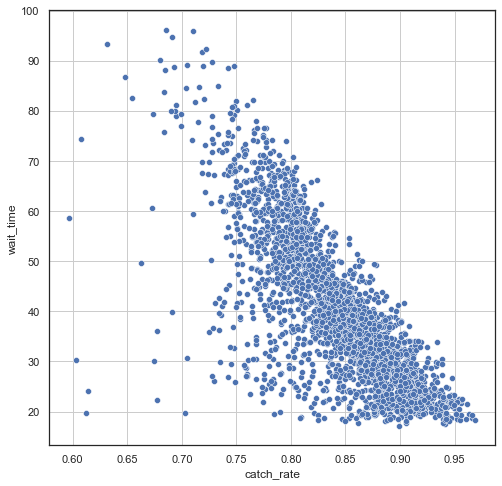

In [227]:
eda_2_nn(data, 'wait_time', 'catch_rate')

* fare

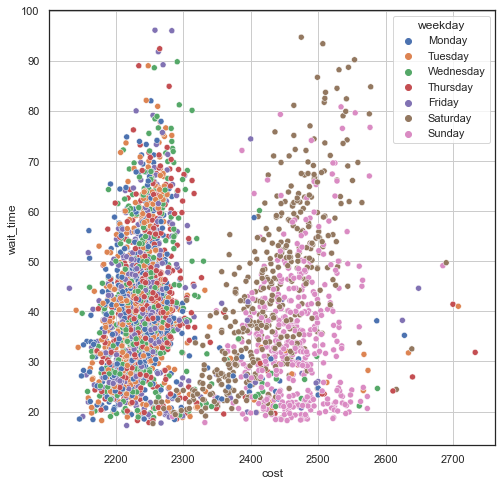

In [228]:
eda_2_nn(data, 'wait_time', 'cost', 'weekday')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 휴일 여부

* 주말 여부

In [229]:
# t-test
h0 = data.loc[data['weekend']==0, 'taxi_count']
h1 = data.loc[data['weekend']==1, 'taxi_count']
spst.ttest_ind(h0, h1)

TtestResult(statistic=79.86527754899427, pvalue=0.0, df=2921.0)

In [388]:
# t-test
h0 = data.loc[data['rain']==0, 'call']
h1 = data.loc[data['rain']==1, 'call']
spst.ttest_ind(h0, h1)

TtestResult(statistic=1.108532632038895, pvalue=0.26772311781983127, df=2921.0)

In [427]:

data['hot'] = data['temp_max']
data['hot'] = data['temp_max'].map(lambda x: 1 if x>31 else 0 )

In [428]:
# t-test
h0 = data.loc[data['hot']==0, 'call']
h1 = data.loc[data['hot']==1, 'call']
spst.ttest_ind(h0, h1)

TtestResult(statistic=-2.2267916752149794, pvalue=0.02603716232380736, df=2921.0)

In [445]:

data['cold'] = data['temp_max']
data['cold'] = data['temp_max'].map(lambda x: 1 if x<0 else 0 )

In [446]:
# t-test
h0 = data.loc[data['cold']==0, 'wait_time']
h1 = data.loc[data['cold']==1, 'wait_time']
spst.ttest_ind(h0, h1)

TtestResult(statistic=2.2966630882216372, pvalue=0.021708445061346802, df=2921.0)

In [462]:
spst.pearsonr(data['temp_max'],data['wait_time'])

PearsonRResult(statistic=0.040932416287429635, pvalue=0.026898833009725315)

<AxesSubplot:xlabel='temp_max', ylabel='wait_time'>

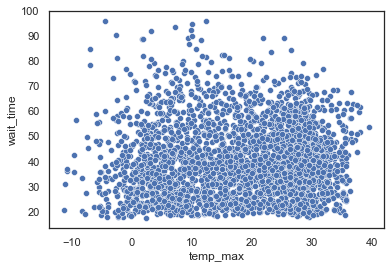

In [463]:
sns.scatterplot(x = 'temp_max',y = 'wait_time', data= data)

-

In [392]:

data['rain'] = data['rain(mm)']
data['rain'] = data['rain'].map(lambda x: 1 if x>15 else 0 )

In [393]:
# t-test
h0 = data.loc[data['rain']==0, 'catch_rate']
h1 = data.loc[data['rain']==1, 'catch_rate']
spst.ttest_ind(h0, h1)

TtestResult(statistic=1.4664751391329869, pvalue=0.14262653367618583, df=2921.0)

,Count,Prop
rain,,
0,2743,0.938419
1,180,0.061581


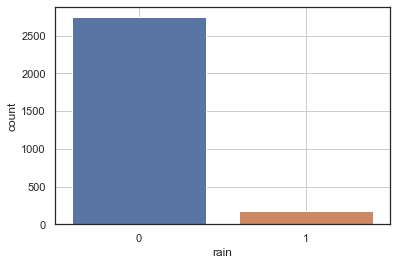

In [382]:
eda_1_c(data,'rain')

In [231]:
# t-test
h0 = data.loc[data['weekend']==0, 'wait_time']
h1 = data.loc[data['weekend']==1, 'wait_time']
spst.ttest_ind(h0, h1)

TtestResult(statistic=2.678771760563849, pvalue=0.007430687870107434, df=2921.0)

In [236]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.rename({'wait_time':'target'},inplace=True)


In [237]:
# t-test
h0 = data.loc[data['holiday']==0, 'wait_time']
h1 = data.loc[data['holiday']==1, 'wait_time']
spst.ttest_ind(h0, h1)

TtestResult(statistic=9.34258937743362, pvalue=1.8079187961897196e-20, df=2921.0)

* 요일

In [242]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data


,Date,taxi_count,call,catch,wait_time,cost,dist,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,season,holiday,week_dist_mean,catch_rate,rain,weekend
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,Winter,1.0,10764.000000,0.903226,0,0
1,2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,Winter,0.0,9687.500000,0.898987,0,0
2,2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,Winter,0.0,9857.666667,0.918689,0,1
3,2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,Winter,0.0,10132.000000,0.927096,0,1
4,2015-01-05,421,4250,3730,26.2,2214,8663,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,Winter,0.0,9838.200000,0.877647,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,Winter,0.0,8567.285714,0.825909,1,0
2919,2022-12-28,607,5654,4648,44.8,2161,7882,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,Winter,0.0,8574.428571,0.822073,0,0
2920,2022-12-29,581,5250,4247,52.5,2229,8433,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,Winter,0.0,8629.000000,0.808952,0,0
2921,2022-12-30,600,5293,4200,38.3,2183,8155,52,12,2022,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,Winter,0.0,8650.714286,0.793501,0,0


In [239]:
# anova
temp = data.loc[data['weekday'].notnull()]
w0 = temp.loc[temp['weekday']=='Monday', 'wait_time']
w1 = temp.loc[temp['weekday']=='Tuesday', 'wait_time']
w2 = temp.loc[temp['weekday']=='Wednesday', 'wait_time']
w3 = temp.loc[temp['weekday']=='Thursday', 'wait_time']
w4 = temp.loc[temp['weekday']=='Friday', 'wait_time']
w5 = temp.loc[temp['weekday']=='Saturday', 'wait_time']
w6 = temp.loc[temp['weekday']=='Sunday', 'wait_time']

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=15.66669048966133, pvalue=8.814291693785567e-18)

* 계절

/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


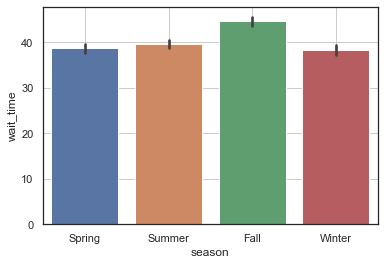

In [240]:
sns.barplot(x = 'season', y = 'wait_time', data = data)
plt.grid()
plt.show()

In [241]:
# anova
temp = data.loc[data['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', 'wait_time']
s1 = temp.loc[temp['season']=='Summer', 'wait_time']
s2 = temp.loc[temp['season']=='Fall', 'wait_time']
s3 = temp.loc[temp['season']=='Winter', 'wait_time']

spst.f_oneway(s0,s1,s2,s3)

F_onewayResult(statistic=32.43282248735729, pvalue=1.2875953782618546e-20)

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# ride_rate, season, weekday,


* 중간(약한) 관계의 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# call, catch, week_dist_mean, 


* (거의) 관계가 없는 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

#나머지

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [280]:
data.groupby(['year','season','month'])[['wait_time']].mean().dropna()

/var/folders/mj/4721wdlx14z7chpqqlq171fw0000gn/T/ipykernel_5338/4068703686.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['year','season','month'])[['wait_time']].mean().dropna()


wait_time
year season month           
2015 Spring 3      30.329032
            4      35.810000
            5      36.196774
     Summer 6      24.606667
            7      33.651613
            8      39.032258
     Fall   9      37.516667
            10     37.512903
            11     38.443333
     Winter 1      26.374194
            2      30.725000
            12     38.196774
2016 Spring 3      35.377419
            4      37.346667
            5      42.041935
     Summer 6      38.643333
            7      40.058065
            8      38.116129
     Fall   9      40.056667
            10     40.164516
            11     39.196667
     Winter 1      31.251613
            2      34.068966
            12     42.745161
2017 Spring 3      36.564516
            4      42.176667
            5      37.603226
     Summer 6      43.526667
            7      40.670968
            8      42.793548
     Fall   9      53.343333
            10     46.687500
            11     53.526667
     Winter 1      33.361290
            2      35.439286
            12     62.970968
2018 Spring 3      53.700000
            4      58.300000
            5      52.009677
     Summer 6      54.836667
            7      58.548387
            8      49.748387
     Fall   9      57.483333
            10     61.051613
            11     68.120000
     Winter 1      38.396774
            2      48.957143
            12     74.435484
2019 Spring 3      57.003226
            4      54.676667
            5      56.777419
     Summer 6      54.053333
            7      47.390323
            8      48.370968
     Fall   9      52.560000
            10     55.451613
            11     62.023333
     Winter 1      48.525806
            2      53.078571
            12     51.825806
2020 Spring 3      20.325806
            4      23.493333
            5      33.058065
     Summer 6      30.190000
            7      32.851613
            8      25.661290
     Fall   9      22.626667
            10     32.709677
            11     29.803333
     Winter 1      38.341935
            2      24.206897
            12     22.829032
2021 Spring 3      24.274194
            4      28.843333
            5      29.264516
     Summer 6      34.740000
            7      26.912903
            8      29.300000
     Fall   9      34.026667
            10     36.670968
            11     41.050000
     Winter 1      20.683871
            2      23.628571
            12     39.077419
2022 Spring 3      23.883871
            4      36.383333
            5      42.500000
     Summer 6      42.456667
            7      40.183871
            8      35.529032
     Fall   9      41.300000
            10     44.867742
            11     44.343333
     Winter 1      30.216129
            2      25.628571
            12     41.625806

In [278]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 3000)

In [286]:
df1 = data.groupby(['year','month'],as_index=False)[['wait_time']].mean().dropna()

<AxesSubplot:xlabel='month', ylabel='wait_time'>

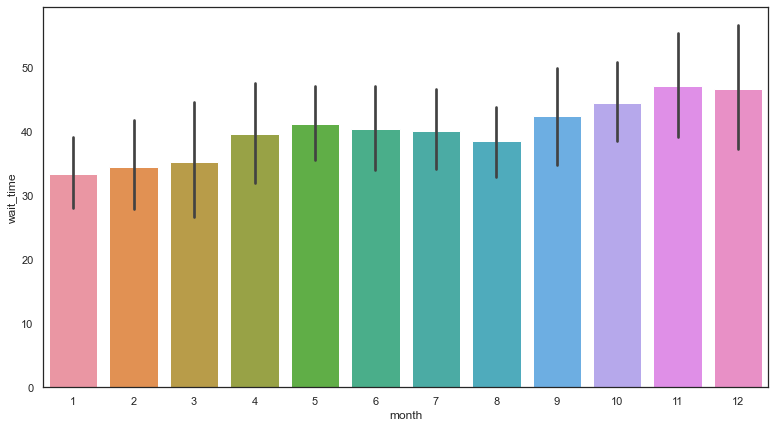

In [289]:
plt.figure(figsize=(13,7))
sns.barplot(x='month',y='wait_time',data=df1)

-------

In [297]:
data.groupby(['weekend'])[['catch_rate']].mean().dropna()

,catch_rate
weekend,
0,0.836561
1,0.854078


In [539]:
data.groupby(['month','holiday'])[['taxi_count']].count().dropna()

taxi_count
month holiday            
1     0.0             233
      1.0              15
2     0.0             209
      1.0              17
3     0.0             240
      1.0               8
4     0.0             239
      1.0               1
5     0.0             233
      1.0              15
6     0.0             232
      1.0               8
7     0.0             248
8     0.0             240
      1.0               8
9     0.0             221
      1.0              19
10    0.0             228
      1.0              21
11    0.0             240
12    0.0             240
      1.0               8

<AxesSubplot:xlabel='month', ylabel='taxi_count'>

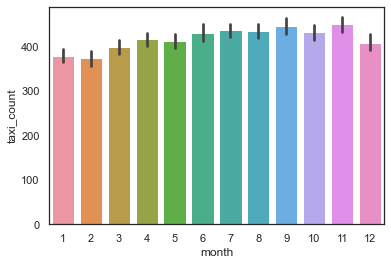

In [543]:
sns.barplot(x='month',y='taxi_count',data= data)

-------

-------

-------

-------

-------

In [467]:
covid = pd.read_excel('covid.xlsx')

ImportError: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.9' currently installed).

In [471]:

import openpyxl

wb = openpyxl.load_workbook('covid.xlsx')
sheet = wb.active
covid = pd.DataFrame(sheet.values)
covid.drop(0,axis=0,inplace=True)


In [472]:
covid.drop(1,axis=0,inplace=True)

In [479]:
covid = covid.set_index(0)

KeyError: 'None of [0] are in the columns'

-------

In [491]:
covid['확진'] = covid.iloc[:,::2].sum(axis=1)

In [492]:
covid['사망'] = covid.iloc[:,1::2].sum(axis=1)

In [496]:
covid = covid.loc[:,['확진','사망']]

In [497]:
covid

,확진,사망
0,,
2020-01-24 00:00:00,2,0
2020-01-30 00:00:00,6,0
2020-01-31 00:00:00,6,0
2020-02-02 00:00:00,2,0
2020-02-05 00:00:00,4,0
2020-02-06 00:00:00,4,0
2020-02-16 00:00:00,4,0
2020-02-19 00:00:00,4,0
2020-02-20 00:00:00,10,0


In [498]:
covid = covid.reset_index()

In [505]:
covid.columns = ['Date','확진','사망']
covid = covid.iloc[:-1,:]

In [506]:
covid['Date'] = pd.to_datetime(covid['Date'],format='%Y%m%d')

/var/folders/mj/4721wdlx14z7chpqqlq171fw0000gn/T/ipykernel_5338/2312499103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['Date'] = pd.to_datetime(covid['Date'],format='%Y%m%d')


In [518]:
data_covid = pd.merge(data, covid, on='Date',how='left')

In [522]:
data_covid['확진']=data_covid['확진'].fillna(0)

/var/folders/mj/4721wdlx14z7chpqqlq171fw0000gn/T/ipykernel_5338/2523626668.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_covid['확진']=data_covid['확진'].fillna(0)


In [523]:
data_covid['사망']=data_covid['사망'].fillna(0)

/var/folders/mj/4721wdlx14z7chpqqlq171fw0000gn/T/ipykernel_5338/523901520.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_covid['사망']=data_covid['사망'].fillna(0)


In [526]:
data_covid.shape

(2923, 27)

/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/b

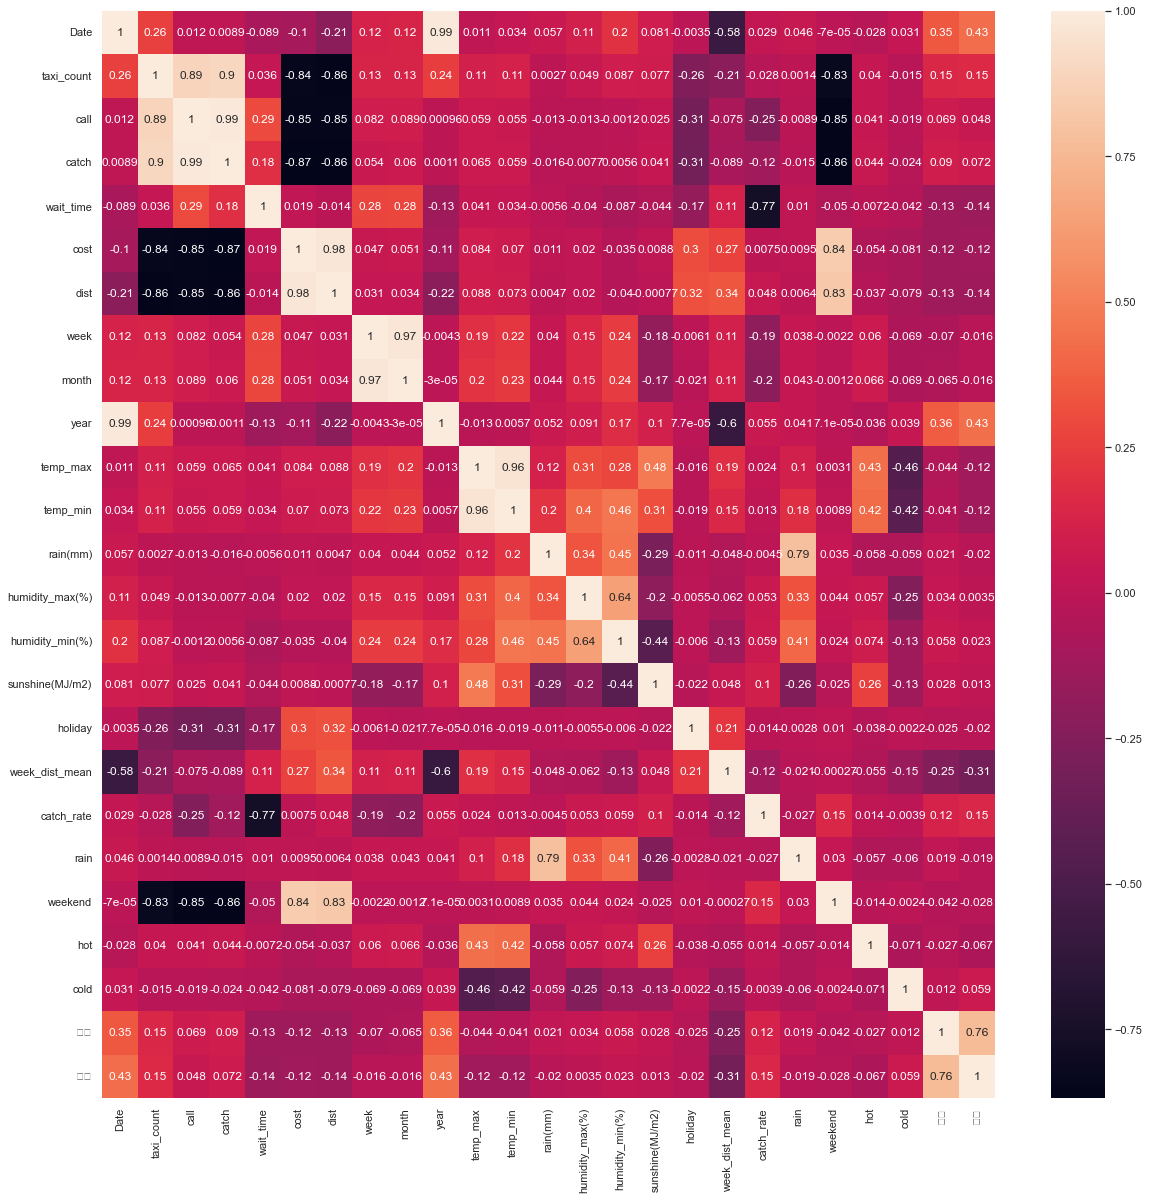

In [530]:
plt.figure(figsize=(20,20))
sns.heatmap(data_covid.drop(['weekday','season'],axis=1).corr(),annot=True)
plt.show()

In [ ]:
data_covid